<a href="https://colab.research.google.com/github/SolemnShark871/Churn/blob/main/NN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
## General packages
import pandas as pd
import numpy as np
import os
import math
from google.colab import drive
from pandas_profiling import ProfileReport
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Dropout

import scipy
import scipy.stats as stats
from sklearn.decomposition import PCA

## Neural networks packages
from keras import layers, models
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

## Neural networks packages
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
from keras import layers, models
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.constraints import maxnorm
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold


from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [2]:
drive.mount('/content/drive', force_remount= True)
os.chdir('/content/drive/MyDrive/Churn') #Thomas & Favio & Juan

os.listdir("./")

Mounted at /content/drive


['NN model.ipynb',
 'personas_retiradas.csv',
 'non_retired_people.csv',
 'retired_people.csv',
 'Datasets_Churn.ipynb',
 'ML models.ipynb',
 'Images',
 'Copy of Spotify challenge.ipynb',
 'not_scaled_not_pca_merged.csv',
 'pca_merged_scaled.csv',
 'not_scaled_not_lambda_merged.csv',
 'standarised_not_pca_merged.csv',
 'pca_merged_standarised.csv',
 'standarised_not_lambda_not_pca_merged.csv',
 'pca_unbiased.csv',
 'Data_exploration.ipynb',
 'SVM_Model.ipynb',
 'LogReg.ipynb']

In [3]:
df_pca = pd.read_csv('pca_unbiased.csv', index_col = [0]) #with pca

df_unbiased_no_pca = pd.read_csv('standarised_not_lambda_not_pca_merged.csv', index_col = [0])


df_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,LABEL
747,0.031118,-0.003853,-0.011866,0.018601,0.033736,-0.005494,-0.010979,-0.004350,-0.008491,-0.004044,0.003058,0.003363,-0.019239,-0.011645,-0.020476,0.011623,-0.004313,-0.000922,0.018945,0.031860,-0.012596,0.026967,0.009459,0.041253,0.000337,-0.045333,-0.022955,0.047356,-0.021057,-0.011200,0.042616,-0.025583,-0.028408,-0.021588,0.002124,-0.030334,-0.004672,0.013303,0.009297,0.011553,...,0.019369,-0.017773,0.055143,-0.016110,-0.064757,-0.073149,0.007010,0.009655,-0.004546,-0.041909,-0.031722,0.001862,-0.028077,-0.018691,-0.010342,-0.028026,0.046765,-0.023055,0.003414,0.010596,-0.047592,-0.024576,0.013610,-0.033772,-0.048985,0.021626,0.019472,0.003585,-0.021219,0.019429,0.036189,-0.021999,-0.000178,-0.042560,-0.012701,0.004586,0.005243,0.040577,0.009950,1
1316,-0.016303,-0.001187,0.003726,-0.008985,0.005879,0.002926,0.007836,-0.003121,-0.006686,-0.001131,0.006543,-0.003919,0.003270,-0.000580,0.002373,0.002159,0.000052,-0.000881,-0.001427,-0.012090,0.000573,-0.005820,-0.007604,-0.003316,-0.001462,-0.007192,-0.000611,-0.000608,-0.005052,-0.000180,0.015975,-0.001644,0.000741,0.007508,0.009801,0.013718,0.008082,-0.005065,0.019270,-0.004759,...,-0.008615,-0.003489,-0.021904,0.033599,0.011564,-0.001809,0.010554,-0.025474,-0.019840,-0.007292,-0.004327,0.006783,-0.006779,0.010027,-0.012686,0.004801,-0.008030,-0.008941,-0.021905,0.009931,-0.020245,-0.012941,-0.001704,0.011402,-0.001268,0.006296,-0.014958,-0.008104,0.011017,0.018719,0.030700,-0.013505,-0.001509,0.014471,0.007839,0.021143,0.001272,0.010410,0.007295,0
1361,0.014932,-0.004766,0.008003,-0.000712,0.013841,-0.013318,-0.027135,0.000811,-0.035305,0.065424,-0.008593,0.007759,0.030770,0.041065,0.037136,-0.005233,0.008501,0.014370,-0.009594,0.010161,-0.003037,-0.013271,-0.039381,-0.009662,-0.014552,-0.007745,-0.009387,-0.002472,0.002183,-0.003069,0.027628,-0.005477,-0.001515,0.024060,-0.001291,0.021617,0.003013,-0.015203,-0.007885,-0.013418,...,-0.007142,-0.038025,-0.009068,-0.010500,-0.006222,0.018688,-0.010502,-0.010069,-0.016253,-0.005338,-0.000777,0.010455,0.000602,0.007105,-0.013949,0.028996,-0.007629,-0.004710,-0.013989,0.004434,0.002766,0.033340,-0.041802,-0.023806,0.029329,0.023717,-0.019865,-0.007484,-0.005090,0.004732,0.004636,0.013462,-0.008810,0.021628,-0.011522,-0.023228,-0.000628,-0.002695,0.002805,0
924,-0.016974,-0.000849,0.001470,-0.015320,0.005249,0.002551,0.013925,-0.011034,-0.012120,-0.004383,0.013050,-0.011838,-0.000352,0.008503,0.002403,0.002772,-0.001211,-0.000085,-0.009225,-0.013477,-0.007370,-0.001977,-0.005429,0.007428,0.003846,-0.022259,0.006405,-0.007271,-0.013599,0.021655,-0.005885,-0.004706,-0.000309,-0.009926,-0.002277,-0.005726,0.001415,-0.010554,0.005684,-0.001971,...,0.003523,-0.010234,0.021910,-0.003193,-0.024411,-0.001097,0.013476,0.001164,-0.002744,0.011789,-0.022519,-0.001323,0.009323,-0.012012,-0.012991,0.004734,0.006111,-0.006611,-0.019104,-0.033366,0.031863,0.006658,-0.000310,-0.025879,-0.014433,-0.020640,0.039183,-0.016570,0.008189,-0.002759,-0.038814,0.024968,0.019006,-0.027812,-0.011288,-0.029843,0.025593,0.029448,-0.004519,1
503,0.024928,0.017659,-0.038065,0.049302,0.000026,0.029062,0.018498,0.018247,-0.019246,-0.039370,0.036256,0.009989,0.063191,-0.033191,-0.018588,-0.031532,0.004225,-0.025755,0.022520,-0.033296,0.009671,-0.010561,-0.031798,-0.000131,-0.025632,-0.022915,0.000289,-0.008800,0.038730,-0.011514,-0.003864,-0.015652,-0.024730,0.032867,-0.013330,0.028741,-0.018883,-0.013822,-0.033954,-0.037028,...,-0.012566,0.007562,0.019678,-0.025340,0.027589,0.020521,0.025750,-0.003001,0.000837,0.027213,0.010297,0.007678,0.049040,0.000989,0.020195,0.017292,-0.030031,0.000116,-0.035205,-0.014208,-0.036548,0.031512,-0.069569,-0.036498,-0.021156,-0.009861,0.033884,-0.053056

# Neural network

## PCA

In [4]:
### Train test split FOR NUMERICAL ALGORITHMS: 20% test
X = df_pca.drop(['LABEL'], axis = 1)
y = df_pca['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify = y)
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.2, random_state=1234, stratify = y_train)

In [5]:
# Tuneo
# Optimizer, loss, layers number, neurons per each layer, batch size, epochs, 
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [6]:
# Function to create model, required for KerasClassifier
def create_model(
    # Default values
    activation: 'relu',
    dropout_rate : 0,
    init_mode: 'uniform',
    #weight_constraint: 1,
    optimizer: 'adam',
    #learn_rate: 0.01,
    hiden_layers: 2,
    units: [2, 2]) -> tf.keras.Sequential:
    
    # Create the model
    model = Sequential()
    model.add(Dense(X.shape[1], kernel_initializer =  init_mode, activation = activation))
    
    for i in range(hiden_layers):
        model.add(Dense(units = units[i], activation = activation))
        
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer = init_mode, activation = 'sigmoid'))
    model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ['accuracy'])
    
    return model

In [7]:
model = KerasClassifier(build_fn=create_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [8]:
param_grid = {
    "activation": ['selu','softsign','softplus','softmax'],
    #"learn_rate": [0.1, 0.2],
    "init_mode": ['he_normal', 'glorot_normal'],
    #"weight_constraint": [1, 2, 3, 4, 5],
    "dropout_rate": [0.8],
    "units": [[8, 4]],
    "optimizer": ['RMSprop', 'Adam', 'SGD'],
    "hiden_layers": [2],
    "epochs": [15],
    "batch_size":  [128]
}

In [9]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", n_jobs=-1, verbose = 2)

In [10]:
grid_search.fit(X_train.values, y_train.values)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-14f19cb10a4e>", line 1, in <module>
    grid_search.fit(X_train.values, y_train.values)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 891, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 1392, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 851, in evaluate_candidates
    enumerate(candidate_params), enumerate(cv.split(X, y, groups))
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py"

FileNotFoundError: ignored

In [ ]:
grid_search.best_params_

In [7]:
model_f = create_model(activation = "selu", dropout_rate = 0.8, optimizer = 'RMSprop', init_mode = 'glorot_normal',
                       hiden_layers = 2, units = [8, 4])

Score for fold 1: loss of 0.6074320077896118; accuracy of 78.2608687877655%
Score for fold 2: loss of 0.4669783413410187; accuracy of 86.56126260757446%
Score for fold 3: loss of 0.3497232496738434; accuracy of 88.14229369163513%
Score for fold 4: loss of 0.33289608359336853; accuracy of 88.14229369163513%
Score for fold 5: loss of 0.28422287106513977; accuracy of 87.74703741073608%
Average scores for all folds:
> Accuracy: 85.77075123786926 (+- 3.7994046085433415)
> Loss: 0.40825051069259644


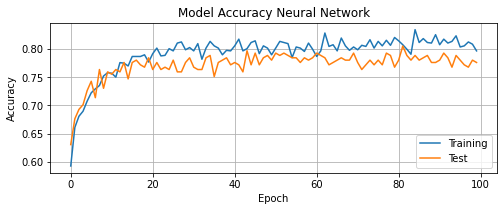

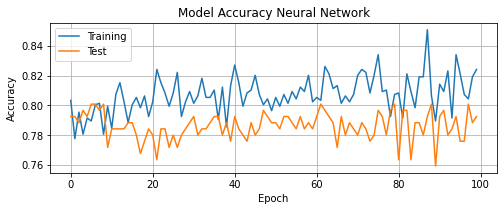

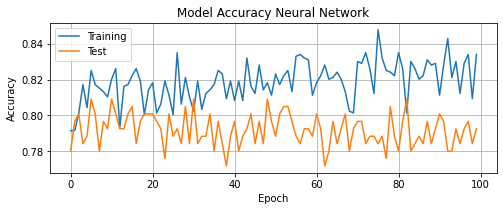

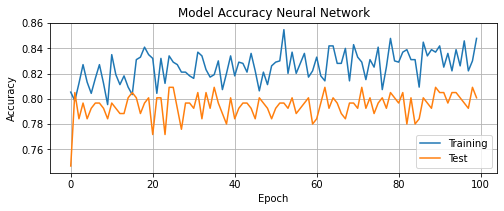

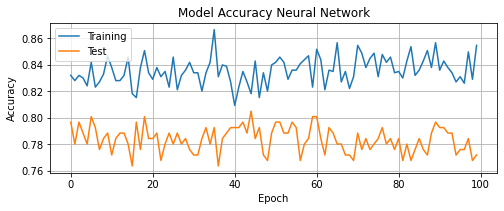

In [8]:
# Define the K-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  history = model_f.fit(inputs[train], targets[train], batch_size = 264, epochs = 100,
                      validation_data = (X_val.values, y_val.values), verbose = 0)

  # Generate generalization metrics
  scores = model_f.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model_f.metrics_names[0]} of {scores[0]}; {model_f.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Plot the accuracy for test and train data
  fig = plt.figure(figsize = (8, 16))
  ax = fig.add_subplot(num_folds, 1, 1)

  ax.plot(history.history['accuracy'])
  ax.plot(history.history['val_accuracy'])

  ax.set_title('Model Accuracy Neural Network')
  ax.set_xlabel('Epoch')

  ax.set_ylabel('Accuracy')
  ax.legend(['Training', 'Test'], loc = 'best')
  ax.grid()

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')

In [9]:
history = model_f.fit(X_train.values, y_train.values, batch_size = 264, epochs = 50,
                      validation_data = (X_val.values, y_val.values), verbose = 0)

In [10]:
loss, accuracy = model_f.evaluate(X_test.values, y_test.values, verbose = 1)

10/10 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8576


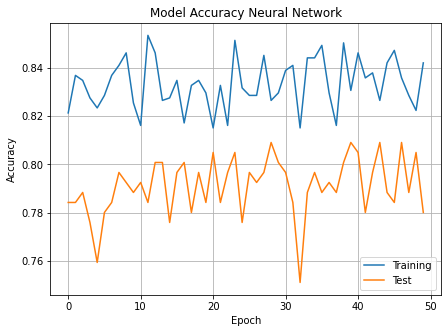

In [11]:
# Plot the accuracy for test and train data
fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])

ax.set_title('Model Accuracy Neural Network')
ax.set_xlabel('Epoch')

ax.set_ylabel('Accuracy')
ax.legend(['Training', 'Test'], loc = 'best')
ax.grid()

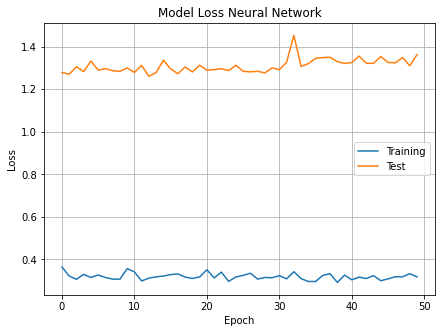

In [12]:
# Plot the loss for test and train data
fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])

ax.set_title('Model Loss Neural Network')
ax.set_xlabel('Epoch')

ax.set_ylabel('Loss')
ax.legend(['Training', 'Test'], loc = 'best')
ax.grid()


### Results (performance)

In [13]:
y_pred = model_f.predict(X_test)

In [14]:
name = 'accuracy'
# metric = round(metrics.accuracy_score(y_test, y_pred
#print(np.argmax(y_pred))

#print(np.round(y_pred))

#print(y_pred.argmax())

In [15]:
labels = [0, 1]
import seaborn as sn

y_predict = np.round(model_f.predict(X_test.values))
report = classification_report(y_test.values, y_predict, zero_division = 0, output_dict = True, labels = labels)
df_report = pd.DataFrame.from_dict(report, orient = 'columns').T
df_report.rename(index = {'0': 'non retired', '1': 'retired'}, inplace = True)
cmap = sn.color_palette('mako', as_cmap = True)
df_image = df_report.style.background_gradient(cmap = cmap)
df_image
#dfi.export(df_image, RESULTS_PATH + 'classification_report.png')
#df_report[['precision', 'recall', 'f1-score']].style.applymap(lambda v: 'background: green' if (v > 0.5) else '')

,precision,recall,f1-score,support
non retired,0.737226,0.935185,0.824490,108.000000
retired,0.957576,0.814433,0.880223,194.000000
accuracy,0.857616,0.857616,0.857616,0.857616
macro avg,0.847401,0.874809,0.852356,302.000000
weighted avg,0.878775,0.857616,0.860292,302.000000


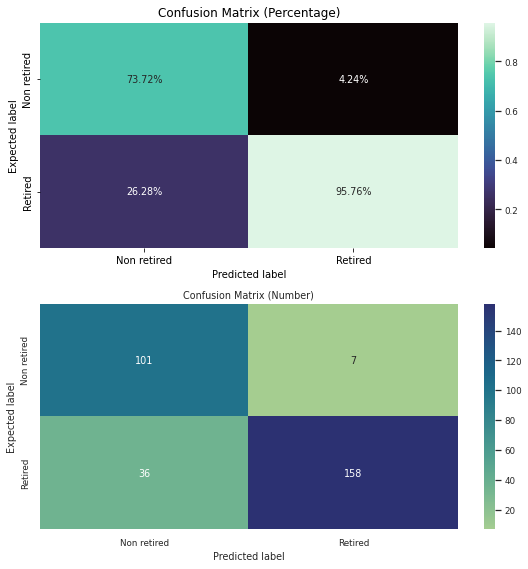

In [16]:
# Confusion matrix plot
#y_predict = np.zeros(y_predicted.shape[0])
#for i in range(y_predicted.shape[0]):
#    y_predict[i] = y_predicted[i,:].argmax() 
    
y_expect = y_test.values
labels = [0, 1]
str_labels = ['Non retired', 'Retired']
cm = confusion_matrix(y_expect, y_predict, labels = labels)
df_cm = pd.DataFrame(cm, index = str_labels, columns = str_labels)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(2, 1, 1)
ax.set_title('Confusion Matrix (Percentage)')
sn.set(font_scale = 0.8)
percentage = df_cm/df_cm.sum()
ax = sn.heatmap(percentage.replace(np.nan, 0), annot = True, fmt = '.2%', cmap = 'mako')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Expected label')

ax = fig.add_subplot(2, 1, 2)
ax.set_title('Confusion Matrix (Number)')
ax = sn.heatmap(df_cm, annot = True, fmt = 'd', cmap = 'crest')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Expected label')
fig.tight_layout()
plt.show()

#ax.figure.savefig(RESULTS_PATH + 'confusionMatrix1.png')
#disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
#disp.plot()

## Non PCA

In [17]:
### Train test split FOR NUMERICAL ALGORITHMS: 20% test
X1 = df_unbiased_no_pca.drop(['LABEL'], axis = 1)
y1 = df_unbiased_no_pca['LABEL']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=1234, stratify = y1)
X_train1, X_val1, y_train1, y_val1 = train_test_split( X_train1, y_train1, test_size=0.2, random_state=1234, stratify = y_train1)

In [18]:
model_f1 = create_model(activation = "softsign", dropout_rate = 0.8, optimizer = 'Adam', init_mode = 'glorot_normal',
                       hiden_layers = 2, units = [8, 4])

Score for fold 1: loss of 0.4591905474662781; accuracy of 80.63241243362427%
Score for fold 2: loss of 0.28749778866767883; accuracy of 89.72331881523132%
Score for fold 3: loss of 0.19542308151721954; accuracy of 93.67588758468628%
Score for fold 4: loss of 0.1936849057674408; accuracy of 93.67588758468628%
Score for fold 5: loss of 0.10847687721252441; accuracy of 98.41897487640381%
Average scores for all folds:
> Accuracy: 91.22529625892639 (+- 5.9703422300743725)
> Loss: 0.24885464012622832


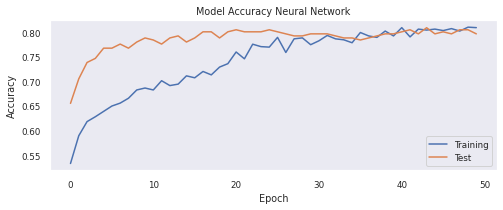

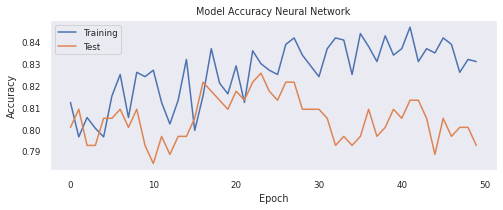

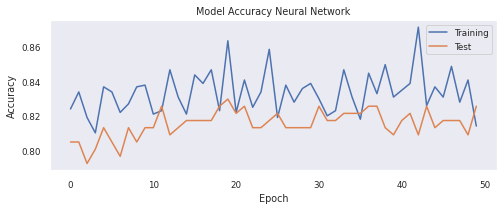

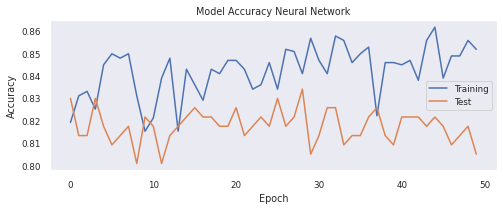

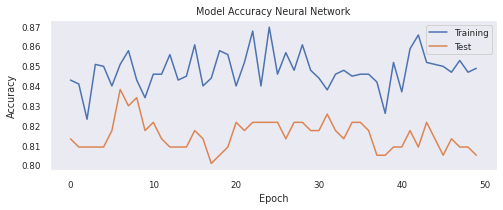

In [19]:
# Define the K-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)
inputs = np.concatenate((X_train1, X_test1), axis=0)
targets = np.concatenate((y_train1, y_test1), axis=0)

# Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  history = model_f1.fit(inputs[train], targets[train], batch_size = 264, epochs = 50,
                      validation_data = (X_val1.values, y_val1.values), verbose = 0)

  # Generate generalization metrics
  scores = model_f1.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model_f1.metrics_names[0]} of {scores[0]}; {model_f1.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Plot the accuracy for test and train data
  fig = plt.figure(figsize = (8, 16))
  ax = fig.add_subplot(num_folds, 1, 1)

  ax.plot(history.history['accuracy'])
  ax.plot(history.history['val_accuracy'])

  ax.set_title('Model Accuracy Neural Network')
  ax.set_xlabel('Epoch')

  ax.set_ylabel('Accuracy')
  ax.legend(['Training', 'Test'], loc = 'best')
  ax.grid()

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')

In [20]:
history = model_f1.fit(X_train1.values, y_train1.values, batch_size = 264, epochs = 50,
                      validation_data = (X_val1.values, y_val1.values), verbose = 0)

In [21]:
loss, accuracy = model_f1.evaluate(X_test1.values, y_test1.values, verbose = 1)

10/10 [==============================] - 0s 2ms/step - loss: 0.1045 - accuracy: 0.9702


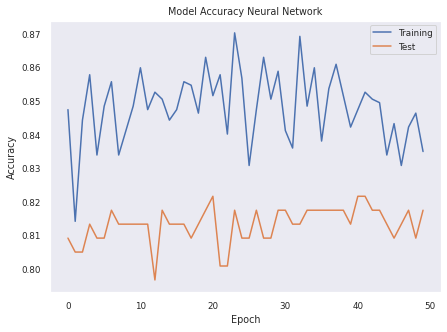

In [22]:
# Plot the accuracy for test and train data
fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])

ax.set_title('Model Accuracy Neural Network')
ax.set_xlabel('Epoch')

ax.set_ylabel('Accuracy')
ax.legend(['Training', 'Test'], loc = 'best')
ax.grid()

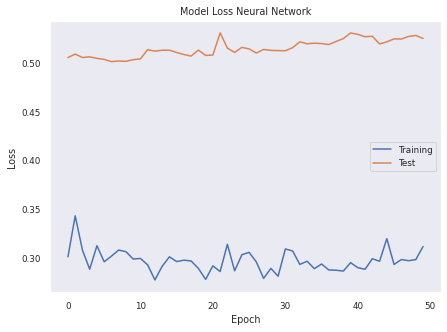

In [23]:
# Plot the loss for test and train data
fig = plt.figure(figsize = (7, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])

ax.set_title('Model Loss Neural Network')
ax.set_xlabel('Epoch')

ax.set_ylabel('Loss')
ax.legend(['Training', 'Test'], loc = 'best')
ax.grid()

### Results (performance)

In [25]:
y_pred = model_f1.predict(X_test1)

In [26]:
name = 'accuracy'
# metric = round(metrics.accuracy_score(y_test, y_pred
#print(np.argmax(y_pred))

#print(np.round(y_pred))

#print(y_pred.argmax())

In [28]:
labels = [0, 1]
import seaborn as sn

y_predict = np.round(model_f1.predict(X_test1.values))
report = classification_report(y_test1.values, y_predict, zero_division = 0, output_dict = True, labels = labels)
df_report = pd.DataFrame.from_dict(report, orient = 'columns').T
df_report.rename(index = {'0': 'non retired', '1': 'retired'}, inplace = True)
cmap = sn.color_palette('mako', as_cmap = True)
df_image = df_report.style.background_gradient(cmap = cmap)
df_image
#dfi.export(df_image, RESULTS_PATH + 'classification_report.png')
#df_report[['precision', 'recall', 'f1-score']].style.applymap(lambda v: 'background: green' if (v > 0.5) else '')

,precision,recall,f1-score,support
non retired,0.923077,1.000000,0.960000,108.000000
retired,1.000000,0.953608,0.976253,194.000000
accuracy,0.970199,0.970199,0.970199,0.970199
macro avg,0.961538,0.976804,0.968127,302.000000
weighted avg,0.972491,0.970199,0.970441,302.000000


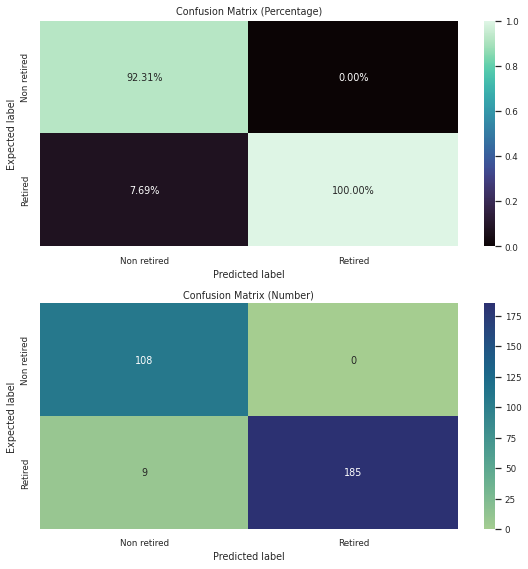

In [29]:
# Confusion matrix plot
#y_predict = np.zeros(y_predicted.shape[0])
#for i in range(y_predicted.shape[0]):
#    y_predict[i] = y_predicted[i,:].argmax() 
    
y_expect = y_test1.values
labels = [0, 1]
str_labels = ['Non retired', 'Retired']
cm = confusion_matrix(y_expect, y_predict, labels = labels)
df_cm = pd.DataFrame(cm, index = str_labels, columns = str_labels)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(2, 1, 1)
ax.set_title('Confusion Matrix (Percentage)')
sn.set(font_scale = 0.8)
percentage = df_cm/df_cm.sum()
ax = sn.heatmap(percentage.replace(np.nan, 0), annot = True, fmt = '.2%', cmap = 'mako')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Expected label')

ax = fig.add_subplot(2, 1, 2)
ax.set_title('Confusion Matrix (Number)')
ax = sn.heatmap(df_cm, annot = True, fmt = 'd', cmap = 'crest')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Expected label')
fig.tight_layout()
plt.show()

#ax.figure.savefig(RESULTS_PATH + 'confusionMatrix1.png')
#disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
#disp.plot()